<a href="https://colab.research.google.com/github/AtharvaKawadkar/Thyroid_Detection_using_ML/blob/main/Thyroid_Detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#importing all necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from  xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn.regression import regplot
from matplotlib import pyplot as plt

In [ ]:
df  = pd.read_csv("/content/ann-train.CSV")
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,T4,T4U,FTI,Target
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.0150,0.120,0.082,0.146,1
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.0300,0.143,0.133,0.108,1
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.0240,0.102,0.131,0.078,1
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.0170,0.077,0.090,0.085,1
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.0260,0.139,0.090,0.153,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0.77,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00006,0.0206,0.125,0.107,0.117,1
3768,0.41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00130,0.0250,0.125,0.114,0.109,1
3769,0.88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.01300,0.0174,0.123,0.099,0.124,1
3770,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00078,0.0206,0.106,0.088,0.121,1


In [ ]:
df = df.drop(['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','T4U','FTI'], axis=1)

In [ ]:
df

,age,sex,TSH,T3,T4,Target
0,0.73,0,0.00060,0.0150,0.120,1
1,0.24,0,0.00025,0.0300,0.143,1
2,0.47,0,0.00190,0.0240,0.102,1
3,0.64,1,0.00090,0.0170,0.077,1
4,0.23,0,0.00025,0.0260,0.139,1
...,...,...,...,...,...,...
3767,0.77,0,0.00006,0.0206,0.125,1
3768,0.41,0,0.00130,0.0250,0.125,1
3769,0.88,0,0.01300,0.0174,0.123,1
3770,0.64,1,0.00078,0.0206,0.106,1


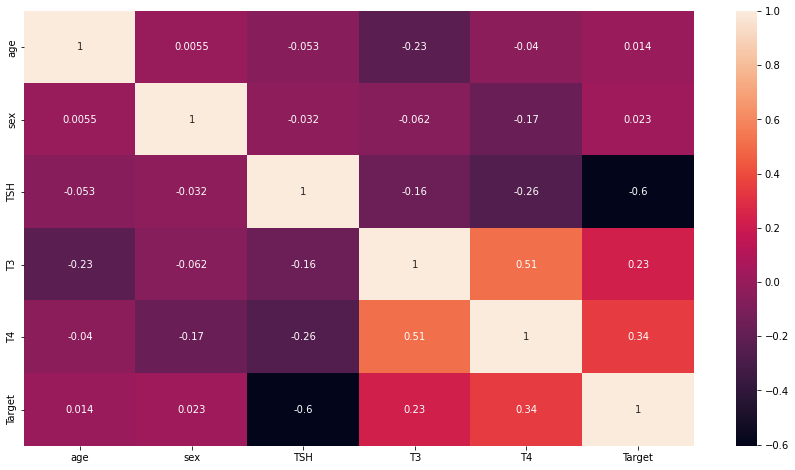

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
# calculate confusion matrix and classifiers 
corr_values = abs(df[df.columns[0:]].corr()['Target'][:])
corr_values = corr_values.drop('Target')
corr_values = corr_values[corr_values > 0.04]
corr_values

TSH    0.604791
T3     0.225713
T4     0.343590
Name: Target, dtype: float64

In [ ]:
# classifying train and test
def holdout(dataframe):
  x = dataframe[corr_values.index]
  y = dataframe['Target']
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42) 
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = holdout(df)

In [ ]:
classifiers = {
    "XGBClassifier" : XGBClassifier(learning_rate=0.01)}

In [ ]:
# calculating accuracy ,precision,recall,F1score of classifier 
def classification(classifiers, X_train, X_test, y_train, y_test):
  res = pd.DataFrame(columns=["Classifier", 
                                "Accuracy", 
                                "Precision", 
                                "Recall", 
                                "F1Score"])
  for name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            pr, rc, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
            res = res.append({"Classifier": name,"Accuracy": round(metrics.accuracy_score(y_test, y_pred), 4),
                              "Precision": round(pr, 4), "Recall":round(rc, 4), "F1Score":round(fs, 4)}, ignore_index=True)
            print("Confusion matrix for: ", name)
            display(confusion_matrix(y_test, y_pred))
  res.set_index("F1Score", inplace=True)
  res.sort_values(by="F1Score", ascending=False, inplace=True)   
  return res

display(classification(classifiers, X_train, X_test, y_train, y_test))

Confusion matrix for:  XGBClassifier


array([[ 14,   5],
       [  1, 735]])

,Classifier,Accuracy,Precision,Recall
F1Score,,,,
0.9097,XGBClassifier,0.9921,0.9633,0.8677


In [ ]:
# importing all required classifiers
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
classifiers1 = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression" : LogisticRegression(),
    "K-Nearest Neighbors" : KNeighborsClassifier(4),
    "Decision Tree" : DecisionTreeClassifier(),
    "Naive Bayes" : GaussianNB(),
    "SVM" : SVC()
}
classifiers1

{'Random Forest': RandomForestClassifier(),
 'Logistic Regression': LogisticRegression(),
 'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=4),
 'Decision Tree': DecisionTreeClassifier(),
 'Naive Bayes': GaussianNB(),
 'SVM': SVC()}

In [ ]:
# calculate confusion matrix and classifiers 
corr_values = abs(df[df.columns[0:]].corr()['Target'][:])
corr_values = corr_values.drop('Target')
corr_values = corr_values[corr_values > 0.04]

X_train1, X_test1, y_train1, y_test1 = holdout(df)
display(classification(classifiers1,X_train1, X_test1, y_train1, y_test1))

Confusion matrix for:  Random Forest


array([[ 15,   4],
       [  1, 735]])

Confusion matrix for:  Logistic Regression


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0,  19],
       [  0, 736]])

Confusion matrix for:  K-Nearest Neighbors


array([[ 17,   2],
       [  2, 734]])

Confusion matrix for:  Decision Tree


array([[ 18,   1],
       [  2, 734]])

Confusion matrix for:  Naive Bayes


array([[ 16,   3],
       [  8, 728]])

Confusion matrix for:  SVM


array([[ 14,   5],
       [  1, 735]])

,Classifier,Accuracy,Precision,Recall
F1Score,,,,
0.9605,Decision Tree,0.9960,0.9493,0.9723
0.9460,K-Nearest Neighbors,0.9947,0.9460,0.9460
0.9269,Random Forest,0.9934,0.9660,0.8941
0.9097,SVM,0.9921,0.9633,0.8677
0.8683,Naive Bayes,0.9854,0.8313,0.9156
0.4936,Logistic Regression,0.9748,0.4874,0.5000


In [ ]:
# importing classifiers table as csv
book11 = pd.read_csv("/content/UCI.csv")
book11

,F1Score,Classifier,Accuracy,Precision,Recall
0,0.9269,Random Forest,0.9934,0.9660,0.8941
1,0.9460,K-Nearest Neighbors,0.9947,0.9447,0.9546
2,0.9605,Decision Tree,0.9960,0.9493,0.9723


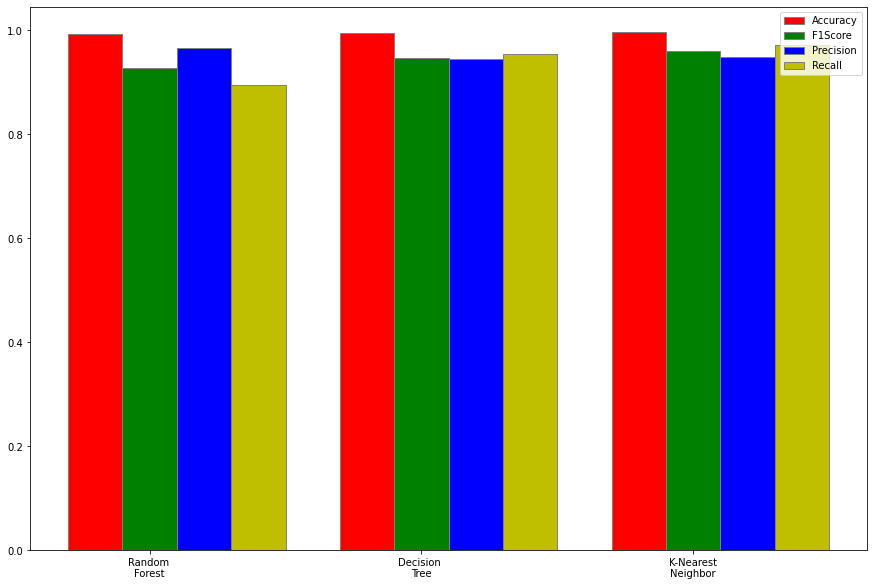

In [ ]:
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(15, 10))

# set height of bar
Accuracy =book11['Accuracy']
F1Score=book11['F1Score']
Precision=book11['Precision']
Recall=book11['Recall']

# Set position of bar on X axis
br1 = np.arange(len(Recall))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4=[x+ barWidth for x in br3]
br5=[x+ barWidth for x in br4]


# Make the plot
plt.bar(br1, Accuracy, color ='r', width = barWidth,
	edgecolor ='grey', label ='Accuracy')
plt.bar(br2, F1Score, color ='g', width = barWidth,
		edgecolor ='grey', label ='F1Score')
plt.bar(br3, Precision, color ='b', width = barWidth,
		edgecolor ='grey', label ='Precision')
plt.bar(br4, Recall, color ='y', width = barWidth,
		edgecolor ='grey', label ='Recall')


# Adding Xticks
plt.xticks([r + barWidth for r in range(len(F1Score))],
		['Random \nForest', 'Decision \nTree', 'K-Nearest\nNeighbor', 'Naive \nBayes', 'SVM','Logistic \nRegression'])

plt.legend()
plt.show()

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

def plot_roc_curve(y_test, y_pred):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

Decision Tree AUC score: 0.9460097254004577


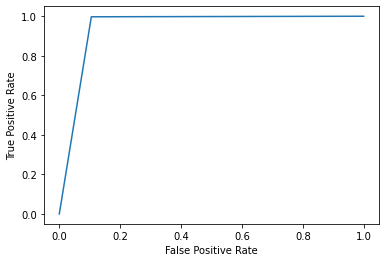

In [ ]:
plot_roc_curve(y_test, y_pred)
print(f'Decision Tree AUC score: {roc_auc_score(y_test, y_pred)}')

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.8920194508009154

In [ ]:
# create regressor object
regressor = RandomForestClassifier()
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

y_pred1 = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


Random Forest AUC score: 0.9203732837528604


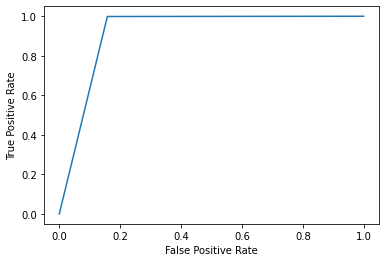

In [ ]:
plot_roc_curve(y_test, y_pred1)
print(f'Random Forest AUC score: {roc_auc_score(y_test, y_pred1)}')

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred1)

0.8876222271274009

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 

y_pred3 = knn.predict(X_test)

K-Nearest Neighbor AUC score: 0.8940574942791761


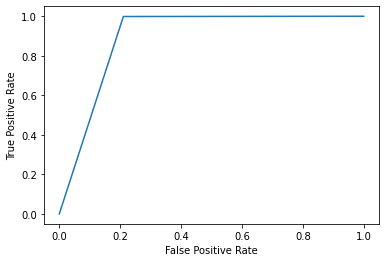

In [ ]:
plot_roc_curve(y_test, y_pred3)
print(f'K-Nearest Neighbor AUC score: {roc_auc_score(y_test, y_pred3)}')

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred3)

0.8570834008997623